<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several factors describing the quality of white wine. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

Data citation: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


#### Load the first dataset and check the first two observations

In [2]:
df = pd.read_csv('whitewine.csv',sep=';')

df.head(5)
#df.shape


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
# check data types of variables
# type your code here
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

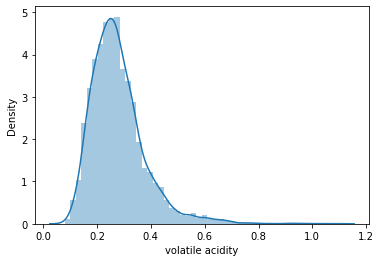

In [95]:
# type your code here
y = df["quality"]

x = df.drop("quality", axis =1)

xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
model.summary()

sns.distplot(df["volatile acidity"])
plt.show()

# variable volatile acidity no need to transform beacause variable is significant (p_val < 0.05)

In [ ]:
# looking for 



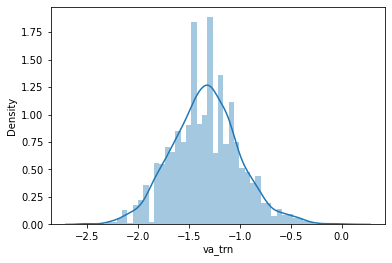

In [101]:
df["va_trn"] = np.log(df["volatile acidity"])
# va_trn.skew()

sns.distplot(df["va_trn"])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

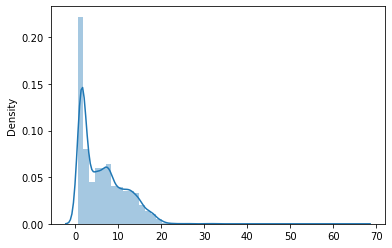

0.31620347950253724

In [102]:
# type your code here

sns.distplot(x = df["residual sugar"])
plt.show()

df["residual sugar"].skew()





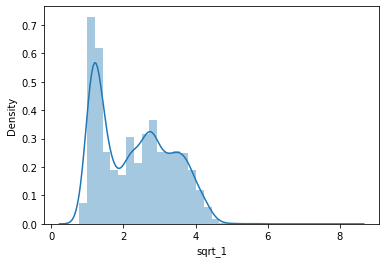

0.31620347950253724

In [111]:
# using square root transform
df["sqrt_1"] = np.sqrt(df["residual sugar"])
sns.distplot(df["sqrt_1"])
plt.show()

df["sqrt_1"].skew()

In [110]:
A = stats.boxcox(df["residual sugar"])
stats.skew(A[0])

# looking at the transformation method, we can use boxcox for residual sugar column.

-0.05190118486727419

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sat, 12 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:03:39   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928     18.804      7.987      0.000     113.328     187.057
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
df.var()

fixed acidity              0.712114
volatile acidity           0.010160
citric acid                0.014646
residual sugar            25.725770
chlorides                  0.000477
free sulfur dioxide      289.242720
total sulfur dioxide    1806.085491
density                    0.000009
pH                         0.022801
sulphates                  0.013025
alcohol                    1.514427
quality                    0.784356
va_trn                     0.114351
sqrt_1                     1.007050
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

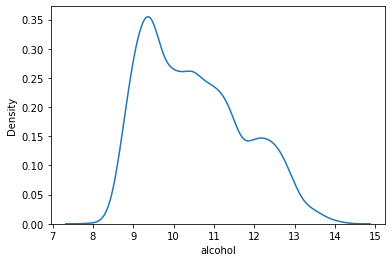

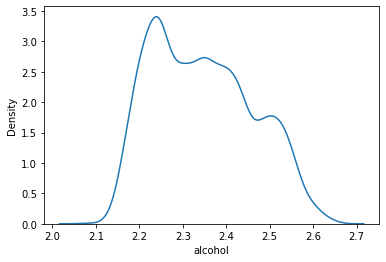

(0.310134622964236, 0.4873419932161276)

In [113]:
# type your code here
df["alcohol"].skew()
sns.distplot(df["alcohol"], hist = False)
plt.show()

# using log transform
alco_trn = np.log(df["alcohol"])
alco_trn.skew() , df["alcohol"].skew()

sns.distplot(alco_trn, hist = False)
plt.show()

alco_trn.skew() , df["alcohol"].skew()

In [117]:
A = stats.boxcox(df["alcohol"])
stats.skew(A[0])


0.05927793859085263

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [132]:
df["pH"].describe()

model.summary()

#df["Z_score"] = stats.zscore(df["pH"])
#df["Z_score"]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     150.7
Date:                Sat, 12 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:53:17   Log-Likelihood:                -5528.6
No. Observations:                4898   AIC:                         1.109e+04
Df Residuals:                    4884   BIC:                         1.118e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.9990     19.589      7.708      0.000     112.596     189.402
fixed acidity            0.0606      0.021      2.875      0.004       0.019       0.102
volatile acidity         0.1446      0.408      0.355      0.723      -0.655       0.944
citric acid              0.0496      0.096      0.519      0.604      -0.138       0.237
residual sugar           0.0561      0.015      3.772      0.000       0.027       0.085
chlorides               -0.2597      0.545     -0.476      0.634      -1.328       0.809
free sulfur dioxide      0.0035      0.001      4.114      0.000       0.002       0.005
total sulfur dioxide    -0.0001      0.000     -0.289      0.773      -0.001       0.001
density               -150.4718     19.663     -7.652      0.000    -189.021    -111.923
pH                       0.0489      0.008      6.115      0.000       0.033       0.065
sulphates                0.6239      0.100      6.232      0.000       0.428       0.820
alcohol                  0.1964      0.025      7.990      0.000       0.148       0.245
va_trn                  -0.6308      0.122     -5.166      0.000      -0.870      -0.391
sqrt_1                   0.1345      0.058      2.320      0.020       0.021       0.248
Z_score                  0.0489      0.008      6.115      0.000       0.033       0.065
==============================================================================
Omnibus:                      114.498   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.245
Skew:                           0.075   Prob(JB):                     1.68e-55
Kurtosis:                       4.102   Cond. No.                     7.97e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.74e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [130]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df["pH"] = ss.fit_transform(pd.DataFrame(df["pH"]))
df["pH"]



0      -1.246921
1       0.740029
2       0.475102
3       0.011480
4       0.011480
          ...   
4893    0.541334
4894   -0.253446
4895   -1.313153
4896    1.004955
4897    0.475102
Name: pH, Length: 4898, dtype: float64

In [133]:
y = df["quality"]

x = df.drop("quality", axis =1)

xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     150.7
Date:                Sat, 12 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:53:36   Log-Likelihood:                -5528.6
No. Observations:                4898   AIC:                         1.109e+04
Df Residuals:                    4884   BIC:                         1.118e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.9990     19.589      7.708      0.000     112.596     189.402
fixed acidity            0.0606      0.021      2.875      0.004       0.019       0.102
volatile acidity         0.1446      0.408      0.355      0.723      -0.655       0.944
citric acid              0.0496      0.096      0.519      0.604      -0.138       0.237
residual sugar           0.0561      0.015      3.772      0.000       0.027       0.085
chlorides               -0.2597      0.545     -0.476      0.634      -1.328       0.809
free sulfur dioxide      0.0035      0.001      4.114      0.000       0.002       0.005
total sulfur dioxide    -0.0001      0.000     -0.289      0.773      -0.001       0.001
density               -150.4718     19.663     -7.652      0.000    -189.021    -111.923
pH                       0.0489      0.008      6.115      0.000       0.033       0.065
sulphates                0.6239      0.100      6.232      0.000       0.428       0.820
alcohol                  0.1964      0.025      7.990      0.000       0.148       0.245
va_trn                  -0.6308      0.122     -5.166      0.000      -0.870      -0.391
sqrt_1                   0.1345      0.058      2.320      0.020       0.021       0.248
Z_score                  0.0489      0.008      6.115      0.000       0.033       0.065
==============================================================================
Omnibus:                      114.498   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.245
Skew:                           0.075   Prob(JB):                     1.68e-55
Kurtosis:                       4.102   Cond. No.                     7.97e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.74e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# no change after

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

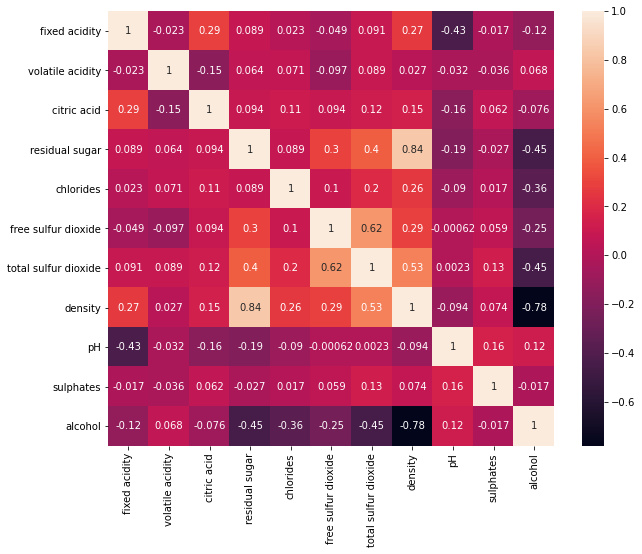

In [54]:
# type your code here
plt.figure(figsize = (10,8))
sns.heatmap(x.corr(), annot = True)
plt.show()

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
pd.DataFrame([vif(xc.values,i) for i in range(xc.shape[1])], index = xc.columns , columns = ["VIF"])


# there is no multi-collinearity in independent variables
# If multicollinearity exists than remove the variables as per the significance level and VIF value 

# remove density from our model after checking VIF value

# model.summary()



,VIF
const,3.348522e+06
fixed acidity,2.757465e+00
volatile acidity,1.473286e+01
citric acid,1.169137e+00
residual sugar,4.971454e+01
chlorides,1.237404e+00
free sulfur dioxide,1.794607e+00
total sulfur dioxide,2.357616e+00
density,3.017600e+01
pH,inf


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

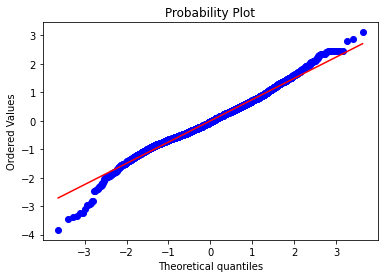

Jarque_beraResult(statistic=251.63681680707353, pvalue=0.0)

In [66]:
res = model.resid

# Visualization of residuals using Q-Q plot

stats.probplot(res, plot = plt)
plt.show()

# h0: data is normal
# ha: data is not normal

stats.jarque_bera(res)

# p_val < 0.05
# reject the null hypothesis
# hence residuals are not normal


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [140]:
model.summary()

y = df["quality"]

x1 = xc.drop("citric acid", axis =1)

df["citric acid"].skew()

# log transform
ca_trn = np.sqrt(df["citric acid"])

x2 = pd.concat([x1, ca_trn], axis =1)

model2 = sm.OLS(y,x2).fit()

print(model2.summary())
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     151.0
Date:                Sat, 12 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:04:01   Log-Likelihood:                -5527.1
No. Observations:                4898   AIC:                         1.108e+04
Df Residuals:                    4884   BIC:                         1.117e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  152.4675 

In [ ]:
# slight improvement on the model 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

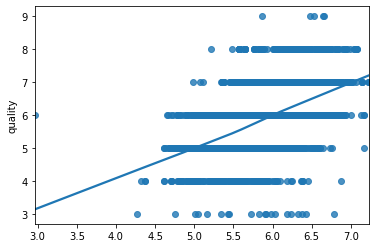

In [160]:
# model.summary()
y = df["quality"]

y_pred = model.predict(xc)
sns.regplot(x = y_pred, y =y, lowess = True)
plt.show()

In [149]:
#fig,ax = plt.subplot()

# x = x.drop(["density","Z_score", "va_trn", "sqrt_1"], axis = 1)


In [151]:
x.shape

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

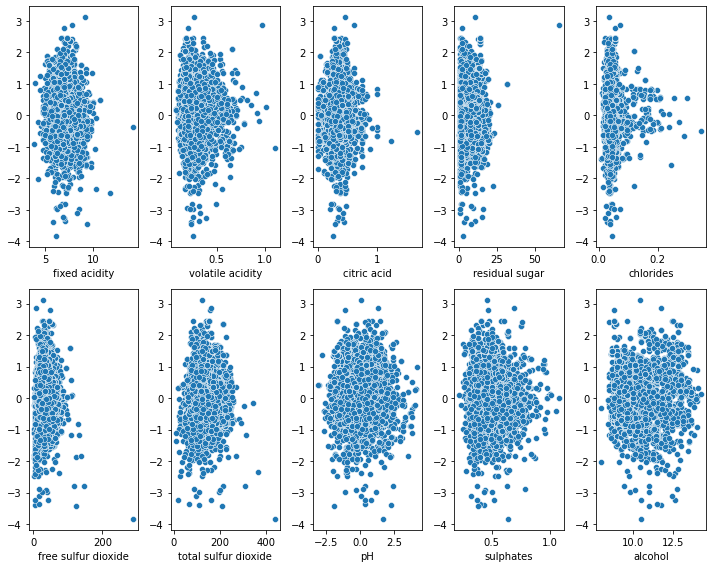

In [159]:
fig,ax = plt.subplots(nrows = 2, ncols =5, figsize = (10,8))
for variable,subplot in zip(x.columns[:],ax.flatten()):
    z = sns.scatterplot(x[variable],res,ax = subplot)
plt.tight_layout()
plt.show()


<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
!pip install mlxtend


In [25]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

lir = LinearRegression()

model = sm.OLS(y,xc).fit()
linreg_forward = sfs(estimator = lir, k_features = 5, forward = True, verbose = 2, scoring = 'r2')

# fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

print(sfs_forward.k_feature_names_)

sfs_forward.k_score_


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-06-19 10:40:29] Features: 1/5 -- score: 0.17834254852034404[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-06-19 10:40:29] Features: 2/5 -- score: 0.2290525663316166[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-06-19 10:40:30] Features: 3/5 -- score: 0.24613899165324638[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

('volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'alcohol')


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2021-06-19 10:40:30] Features: 5/5 -- score: 0.2548486920473835

0.2548486920473835

In [17]:
x = df.drop("quality", axis =1)
y = df.quality
xc = sm.add_constant(x)

model = sm.OLS(y,xc).fit()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
linreg_forward = sfs(estimator = lir, k_features = 5, forward = False, verbose = 2, scoring = 'r2')

sfs_backward = linreg_forward.fit(X_train, y_train)

print(sfs_backward.k_feature_names_)

sfs_forward.k_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-06-19 10:43:15] Features: 10/5 -- score: 0.2615968037532138[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-06-19 10:43:16] Features: 9/5 -- score: 0.2624004669071377[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-06-19 10:43:16] Features: 8/5 -- score: 0.2625240750826849[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

('volatile acidity', 'residual sugar', 'density', 'sulphates', 'alcohol')


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2021-06-19 10:43:16] Features: 6/5 -- score: 0.2598683242043774[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-06-19 10:43:16] Features: 5/5 -- score: 0.25594096384136295

0.2548486920473835

In [8]:
cols = list(xc.columns)
while len(cols) > 0:
    x1 = xc[cols]
    model = sm.OLS(y,x1).fit()
    p = model.pvalues
    p = p.drop("const")
    pmax = max(p)
    feature_pmax = p.idxmax()
    if(pmax > 0.05):
        cols.remove(feature_pmax)
        print(feature_pmax, "removed variable")
    else:
        break
        
sel_feature = cols
print(sel_feature)

citric acid removed variable
chlorides removed variable
total sulfur dioxide removed variable
['const', 'fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
linreg_forward = sfs(estimator = lir, k_features = (2,6), forward = True, verbose = 2, scoring = 'r2')

sfs_tu = linreg_forward.fit(X_train, y_train)

print(sfs_tu.k_feature_names_)

sfs_tu.k_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-06-19 10:49:27] Features: 1/6 -- score: 0.17834254852034404[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-06-19 10:49:27] Features: 2/6 -- score: 0.2290525663316166[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-06-19 10:49:27] Features: 3/6 -- score: 0.24613899165324638[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

('volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'sulphates', 'alcohol')


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2021-06-19 10:49:27] Features: 5/6 -- score: 0.2548486920473835[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-06-19 10:49:27] Features: 6/6 -- score: 0.2593508319099231

0.2593508319099231

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
linreg_forward = sfs(estimator = lir, k_features = "best", forward = True, verbose = 2, scoring = 'r2')

sfs_best = linreg_forward.fit(X_train, y_train)

print(sfs_tu.k_feature_names_)

sfs_best.k_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-06-19 10:49:04] Features: 1/11 -- score: 0.17834254852034404[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-06-19 10:49:04] Features: 2/11 -- score: 0.2290525663316166[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-06-19 10:49:04] Features: 3/11 -- score: 0.24613899165324638[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

('volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')



[2021-06-19 10:49:04] Features: 10/11 -- score: 0.2615968037532138[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-06-19 10:49:04] Features: 11/11 -- score: 0.25752689604433193

0.26263263837143924

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
linreg_backward = sfs(estimator = lir, k_features = "best", forward = False, verbose = 2, scoring = 'r2')

sfs_backbest = linreg_forward.fit(X_train, y_train)

print(sfs_backbest.k_feature_names_)

sfs_backbest.k_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-06-19 10:50:34] Features: 1/6 -- score: 0.17834254852034404[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-06-19 10:50:34] Features: 2/6 -- score: 0.2290525663316166[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-06-19 10:50:34] Features: 3/6 -- score: 0.24613899165324638[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

('volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'sulphates', 'alcohol')


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2021-06-19 10:50:34] Features: 5/6 -- score: 0.2548486920473835[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-06-19 10:50:34] Features: 6/6 -- score: 0.2593508319099231

0.2593508319099231

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
from sklearn.feature_selection import RFE

lir = LinearRegression()
rfe = RFE(lir, n_features_to_select =10) # number of rank1 = 5
rfe.fit(x,y)

rf = pd.DataFrame(rfe.ranking_, index = X_train.columns, columns = ["RFE"])

rf.sort_values(by = "RFE")

rf[rf["RFE"] == 1]

,RFE
fixed acidity,1
volatile acidity,1
citric acid,1
residual sugar,1
chlorides,1
free sulfur dioxide,1
density,1
pH,1
sulphates,1
alcohol,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

lir = LinearRegression()

model = sm.OLS(y,xc).fit()
linreg_forward = sfs(estimator = lir, k_features = 5, forward = True, verbose = 2, scoring = 'r2')

#fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

features = sfs_backward.k_feature_names_
new_x = X_train.loc[:,features]
new_y = y_train.loc[:,features ]

lir = lir.fit(new_x,y_train)



NameError: name 'train_test_split' is not defined

<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [83]:
# create an empty list
ph_verbose=[]

# for the pH value equal to 7 append the list ph_verbose with 'Neutral'
# for the pH value greater than 7 append the list ph_verbose with 'Basic'
# for the pH value less than 7 append the list ph_verbose with 'Acidic'
for i in df["pH"]:
    if i > 7:
        ph_verbose.append("Basic")
    elif i < 7:
        ph_verbose.append("Acidic")
    else:
        ph_verbose.append("Neutral")

df["PH_value"] = ph_verbose

df["PH_value"].value_counts()

Acidic    4898
Name: PH_value, dtype: int64

In [87]:
#df.drop("PH_value", axis =1, inplace = True)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [95]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

model = lir.fit(X_train,y_train)

cv = cross_val_score(model, X_train,y_train, cv =3, scoring = "r2" ) # by default scoring is used 
cv.mean()
cv1 = cross_val_score(model, X_train,y_train, cv =3 )
cv1

array([0.24247312, 0.2694048 , 0.29066387])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [96]:
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

model = lir.fit(X_train,y_train)
kf = KFold(n_splits= 5)

cv = cross_val_score(model, X_train,y_train, cv =kf, scoring = "r2" ) # by default scoring  = R**2
cv.mean()

0.2656176393092129

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [105]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
model = lir.fit(X_train,y_train)

cv = cross_val_score(model, X_train,y_train, cv =loocv, scoring = "neg_root_mean_squared_error" ) # by default scoring is used as per the model apply

np.mean(cv * -1)

0.5905785453952471